In [84]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("odb.csv")
df.head()


,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,1,V Kohli (INDIA),2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,3,RG Sharma (INDIA),2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244
4,4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270


In [85]:
df.isnull().sum()

Unnamed: 0    0
Player        0
Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
4s            0
6s            0
dtype: int64

In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.describe()

,Unnamed: 0,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,119.000000,119.000000,119.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,59.000000,194.672269,184.411765,21.10084,6306.890756,39.347983,7897.941176,81.262605,11.487395,37.008403,10.915966
std,34.496377,94.879684,89.115276,15.81803,3091.187863,7.013547,3894.847910,11.402961,7.577694,20.005294,6.319971
min,0.000000,33.000000,32.000000,1.00000,1447.000000,23.570000,1360.000000,55.930000,5.000000,4.000000,1.000000
25%,29.500000,124.500000,120.000000,8.00000,3928.500000,34.910000,5086.000000,73.455000,6.000000,20.500000,6.000000
50%,59.000000,190.000000,181.000000,16.00000,5964.000000,38.000000,7678.000000,79.980000,9.000000,36.000000,10.000000
75%,88.500000,247.500000,236.500000,33.00000,8079.000000,42.450000,9780.500000,88.405000,14.500000,47.500000,15.000000
max,118.000000,463.000000,452.000000,84.00000,18426.000000,67.000000,21368.000000,118.660000,49.000000,96.000000,34.000000


In [88]:
df.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s'],
      dtype='object')

In [89]:
df.shape

(119, 16)

In [90]:
df=df.drop(columns='Unnamed: 0')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,V Kohli (INDIA),2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,RG Sharma (INDIA),2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244
4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270


In [91]:
df.nunique()

Player    119
Span       95
Mat       102
Inns       93
NO         46
Runs      119
HS         80
Ave       119
BF        119
SR        115
100        25
50         60
0          25
4s        117
6s         92
dtype: int64

In [92]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
4s         object
6s         object
dtype: object

In [93]:
df["hs_runs"] = df["HS"].str.replace("*", "", regex=False).astype(int)

df["hs_not_out"] = df["HS"].str.contains("\*").astype(int)

df=df.drop(columns="HS")

df.head()

,Player,Span,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s,hs_runs,hs_not_out
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,44.83,21368,86.23,49,96,20,2016,195,200,1
1,V Kohli (INDIA),2008-2021,254,245,39,12169,59.07,13061,93.17,43,62,13,1140,125,183,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,42.03,17046,80.39,30,82,20,1231,162,164,0
3,RG Sharma (INDIA),2007-2021,227,220,32,9205,48.96,10354,88.90,29,43,13,832,244,264,0
4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,32.36,14725,91.20,28,68,34,1500,270,189,0


In [94]:
df["4s_plus_flag"] = df["4s"].astype(str).str.contains("\+").astype(int)
df["6s_plus_flag"] = df["6s"].astype(str).str.contains("\+").astype(int)

df["4s"] = df["4s"].str.replace("+", "", regex=False).astype(int)

df["6s"] = df["6s"].str.replace("+", "", regex=False).astype(int)

df.head()

,Player,Span,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s,hs_runs,hs_not_out,4s_plus_flag,6s_plus_flag
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,44.83,21368,86.23,49,96,20,2016,195,200,1,0,0
1,V Kohli (INDIA),2008-2021,254,245,39,12169,59.07,13061,93.17,43,62,13,1140,125,183,0,0,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,42.03,17046,80.39,30,82,20,1231,162,164,0,0,0
3,RG Sharma (INDIA),2007-2021,227,220,32,9205,48.96,10354,88.90,29,43,13,832,244,264,0,0,0
4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,32.36,14725,91.20,28,68,34,1500,270,189,0,0,0


In [95]:
print("Players with 4s+: ", df["4s_plus_flag"].sum())
print("Players with 6s+: ", df["6s_plus_flag"].sum())
print("Players Not Out: ", df["hs_not_out"].sum())


players_not_out = df.loc[df["hs_not_out"] == 1, ["Player", "hs_runs"]]
print(players_not_out.head())

Players with 4s+:  17
Players with 6s+:  16
Players Not Out:  47
                  Player  hs_runs
0   SR Tendulkar (INDIA)      200
10       TM Dilshan (SL)      161
11      LRPL Taylor (NZ)      181
18        AJ Finch (AUS)      153
20        DL Haynes (WI)      152


In [96]:
df.dtypes

Player           object
Span             object
Mat               int64
Inns              int64
NO                int64
Runs              int64
Ave             float64
BF                int64
SR              float64
100               int64
50                int64
0                 int64
4s                int64
6s                int64
hs_runs           int64
hs_not_out        int64
4s_plus_flag      int64
6s_plus_flag      int64
dtype: object

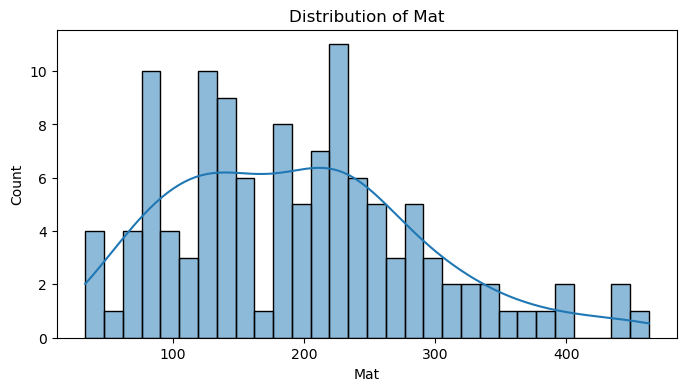

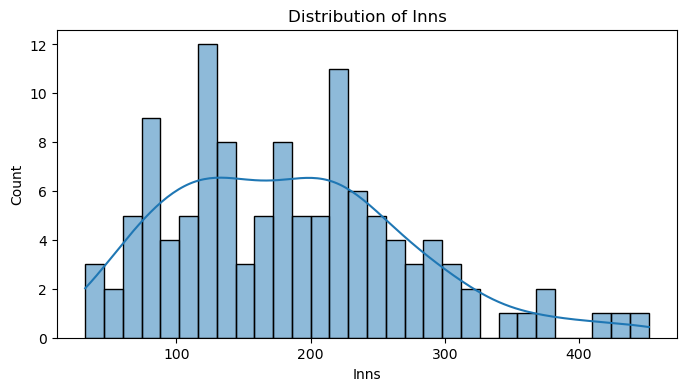

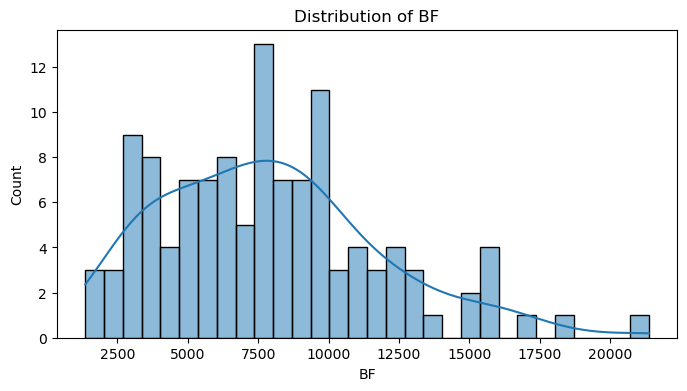

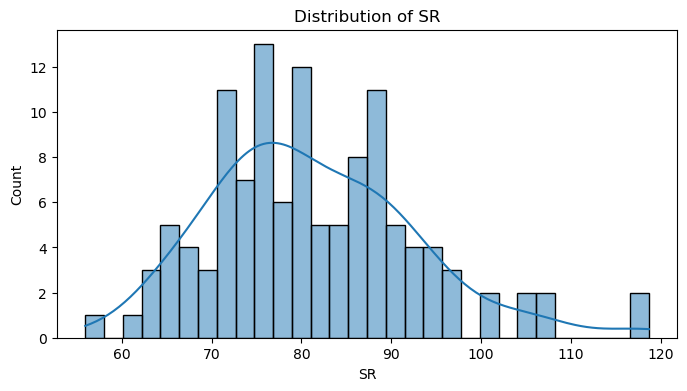

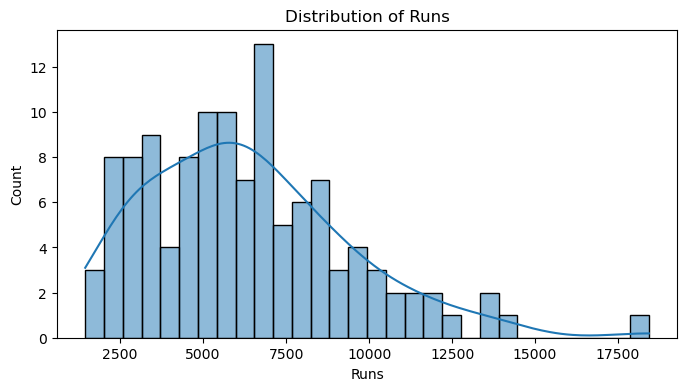

In [97]:
numerical_cols = ['Mat', 'Inns', 'BF', 'SR', 'Runs']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


In [98]:
numerical_cols = ['Mat', 'Inns', 'BF', 'SR', 'Runs']

skew_values = df[numerical_cols].skew()
print(skew_values)

Mat     0.594797
Inns    0.634326
BF      0.741148
SR      0.680106
Runs    0.915915
dtype: float64


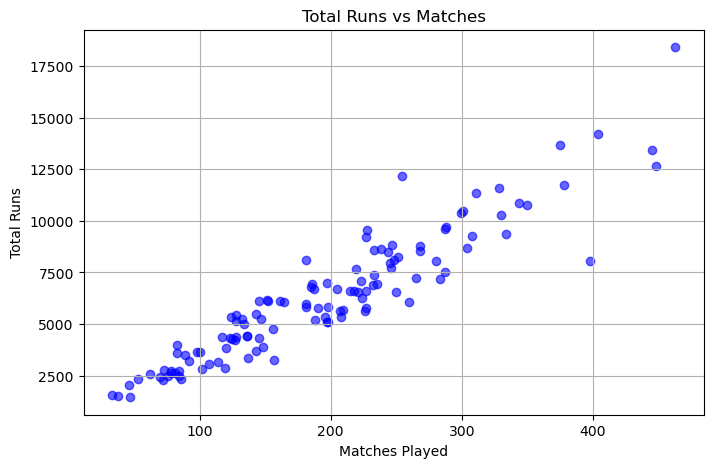

In [99]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8,5))
plt.scatter(df['Mat'], df['Runs'], color='blue', alpha=0.6)
plt.title("Total Runs vs Matches")
plt.xlabel("Matches Played")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()


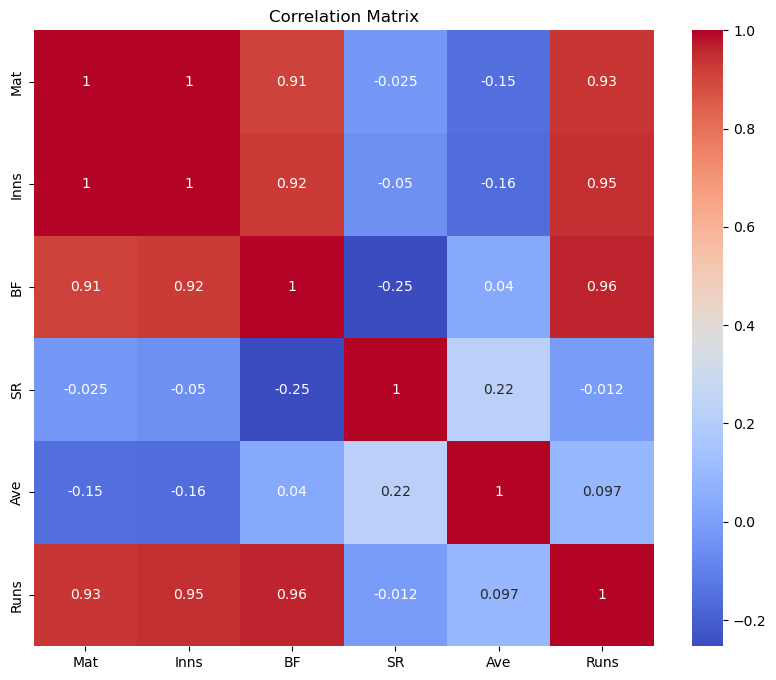

In [100]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df[features + ['Runs']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


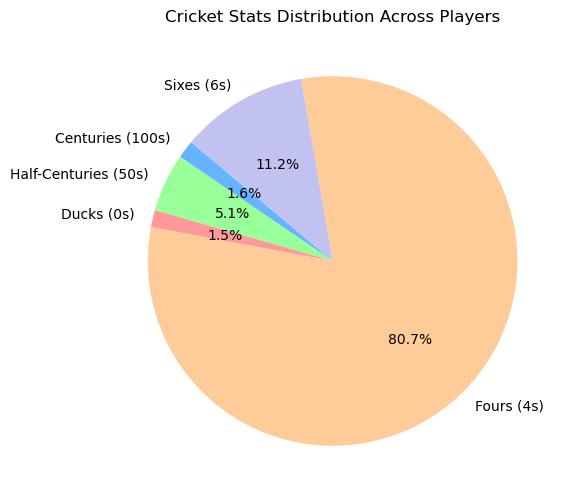

In [102]:
stats_counts = {
    'Centuries (100s)': df['100'].sum(),
    'Half-Centuries (50s)': df['50'].sum(),
    'Ducks (0s)': df['0'].sum(),
    'Fours (4s)': df['4s'].sum(),
    'Sixes (6s)': df['6s'].sum()
}


plt.figure(figsize=(6,6))
plt.pie(stats_counts.values(), labels=stats_counts.keys(), autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0'])
plt.title('Cricket Stats Distribution Across Players')
plt.show()

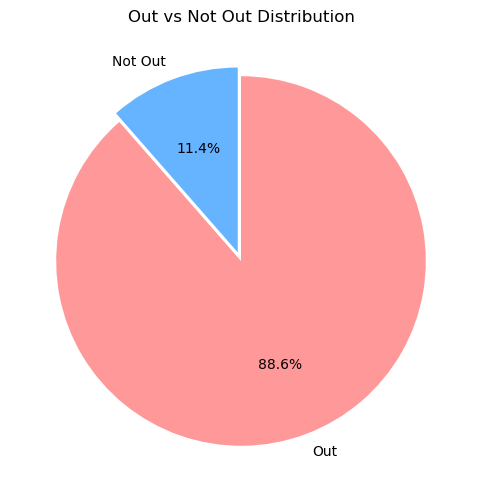

In [103]:

not_out_total = df['NO'].sum()
out_total = df['Inns'].sum() - not_out_total


labels = ['Not Out', 'Out']
sizes = [not_out_total, out_total]
colors = ['#66b3ff', '#ff9999']


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05,0))
plt.title('Out vs Not Out Distribution')
plt.show()